# Time Series Decomposition

## Introduction

Previously, you saw how we can combine several techniques to detrend our time series. Before we move on to our time series models, let's look at another method to remove trend and seasonality, namely **Time Series Decomposition**.

Let's once again import the passengers dataset and the `stationarity_check()` function from the previous lab to use time series decomposition and its effect on detrending a time series.

## Objectives

You will be able to:

- Describe the process and components of time series decomposition 


## Getting Started

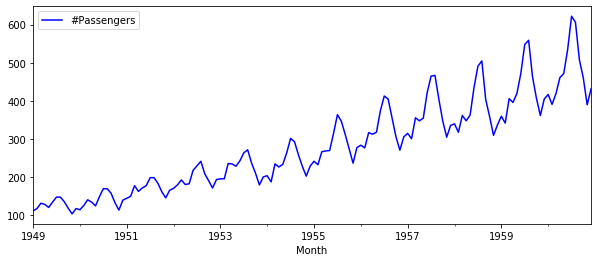

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Import the check_stationarity function from previous lab
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS['#Passengers']) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

# Import 'passengers.csv' dataset
data = pd.read_csv('passengers.csv')

# Change the data type of the 'Month' column
data['Month'] = pd.to_datetime(data['Month'])

# Set the 'Month' column as the index
ts = data.set_index('Month')

# Plot the time series
ts.plot(figsize=(10,4), color='blue');

## Time Series Decomposition

Time series decomposition is a mathematical procedure that transforms a time series into multiple different time series. The original time series is often split into three component series:

- **Seasonal**: Patterns that repeat within a fixed period. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.

- **Trend**: The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.

- **Random**: Also called "noise", "irregular", or "remainder", this is the residual of the original time series after the seasonal and trend series are removed.


## Additive or Multiplicative Decomposition?

To achieve successful decomposition, it is important to choose between the additive and multiplicative models, which requires analyzing the series. For example, does the magnitude of the seasonality increase when the time series increases?

![](images/new_seasonality.png)


Fortunately, `statsmodels` provides the convenient `seasonal_decompose()` function to perform such decomposition out of the box. Details of this function are available [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html). 

In the following cell, we will: 

- Import `seasonal_decompose()` from `statsmodels.tsa.seasonal`  
- Apply `seasonal_decompose()` to the log transformed time series   
- Plot the trend, seasonality, and residuals   

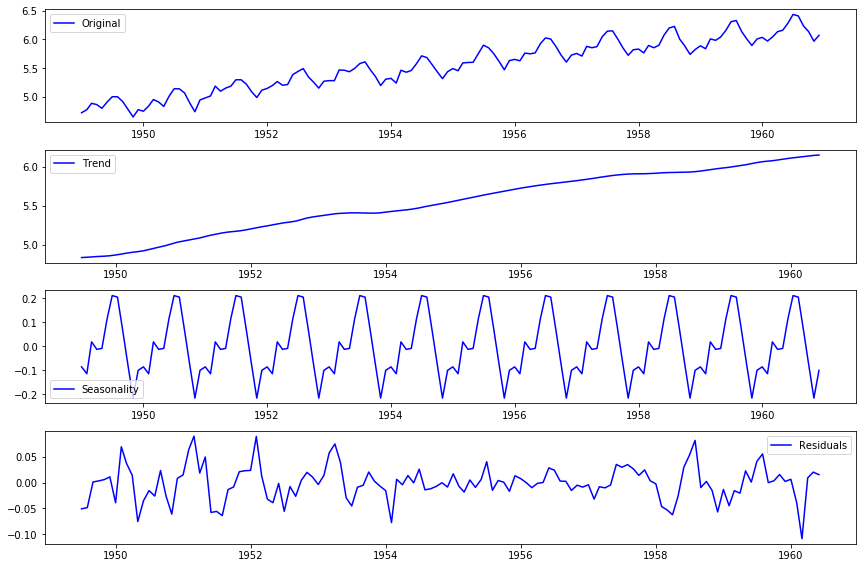

In [2]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(ts))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

Here we can see that the trend and seasonality are separated from data and we can model the residuals.

Using time-series decomposition makes it easier to quickly identify a changing mean or variation in the data. The plot above clearly shows the upward trend of our data, along with its yearly seasonality. These can be used to understand the structure of our time series. The intuition behind time series decomposition is important, as many forecasting methods are built upon this concept of structured decomposition to produce forecasts.

Lets check stationarity of residuals using our `check_stationarity()` function.

> NOTE: We first drop the missing values. 

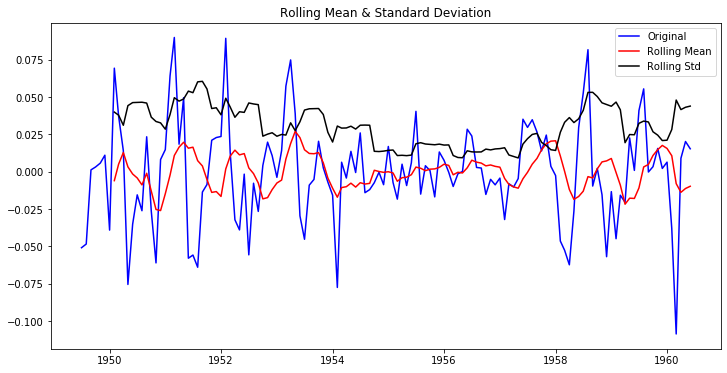

Results of Dickey-Fuller Test: 

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [3]:
# Drop missing values from residuals 
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(ts_log_decompose)

The Dickey-Fuller test statistic is significant and very well below a (strict) 0.01 mark. So it seems reasonable to assume this time series is stationary.

## Additional resources

We strongly recommend you to read this blogpost on [decomposing time series](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)!

## Summary
In this lesson, we saw how to remove both trend and seasonality from a time-series using time series decomposition. We saw how decomposition allows us to better model the time series for further analysis. You are now ready to perform predictive analyses and modeling with time series data!